<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%206/clusteringweek6_asyraff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving clusteringweek06.csv to clusteringweek06.csv


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv('clusteringweek06.csv')

# Tampilkan beberapa baris untuk memastikan data telah terunggah
print(df.head())

# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)


    x1        x2        x3        x4        x5        x6        x7        x8  \
0  1.0  0.152936 -0.105586  0.200722  0.317201  0.260764  0.100945 -0.150063   
1  1.0  0.171534 -0.098975  0.268425  0.338672  0.268353  0.060835 -0.222475   
2  1.0  0.152317 -0.082973  0.287128  0.276014  0.189867  0.008714 -0.242234   
3  1.0  0.224392  0.118985  0.329432  0.372088  0.361005  0.015501 -0.194347   
4  1.0  0.087817 -0.068345  0.306967  0.330923  0.249144  0.006884 -0.265423   

         x9       x10  ...       x13       x14       x15       x16       x17  \
0 -0.171128  0.124676  ... -0.156436  0.082245  0.135752 -0.024017 -0.108351   
1 -0.207693  0.170883  ... -0.254341  0.022786  0.163320  0.012022 -0.090974   
2 -0.219153  0.232538  ... -0.237384  0.050791  0.207338  0.083536 -0.050691   
3 -0.098181  0.270375  ... -0.317084 -0.011567  0.100413 -0.050224 -0.136009   
4 -0.172700  0.266434  ... -0.298524  0.037439  0.219153  0.062837 -0.048885   

        x18       x19       x20       

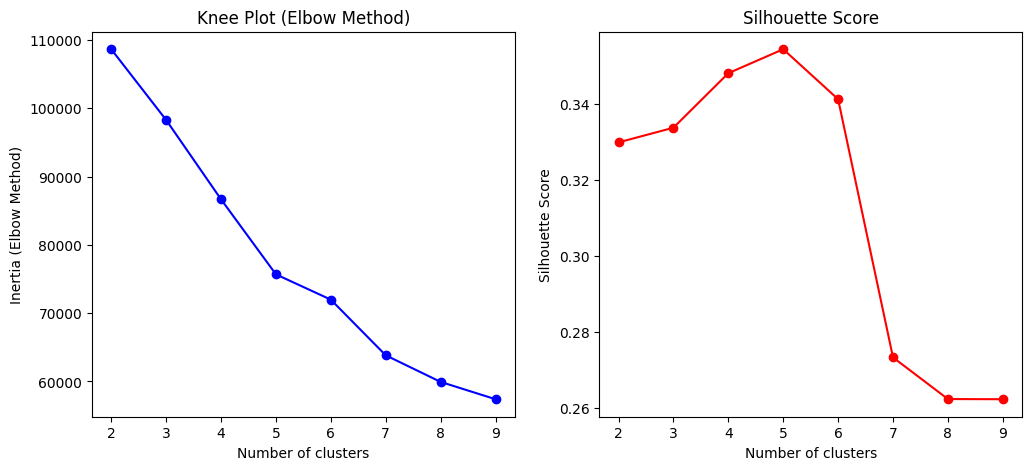

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menggunakan Elbow Method untuk menemukan jumlah cluster terbaik
inertia = []
silhouette = []
K = range(2, 10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(data_scaled)
    inertia.append(model.inertia_)
    silhouette.append(silhouette_score(data_scaled, model.labels_))

# Plot Elbow dan Silhouette
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Elbow Method)')
plt.title('Knee Plot (Elbow Method)')

plt.subplot(1, 2, 2)
plt.plot(K, silhouette, 'ro-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.show()


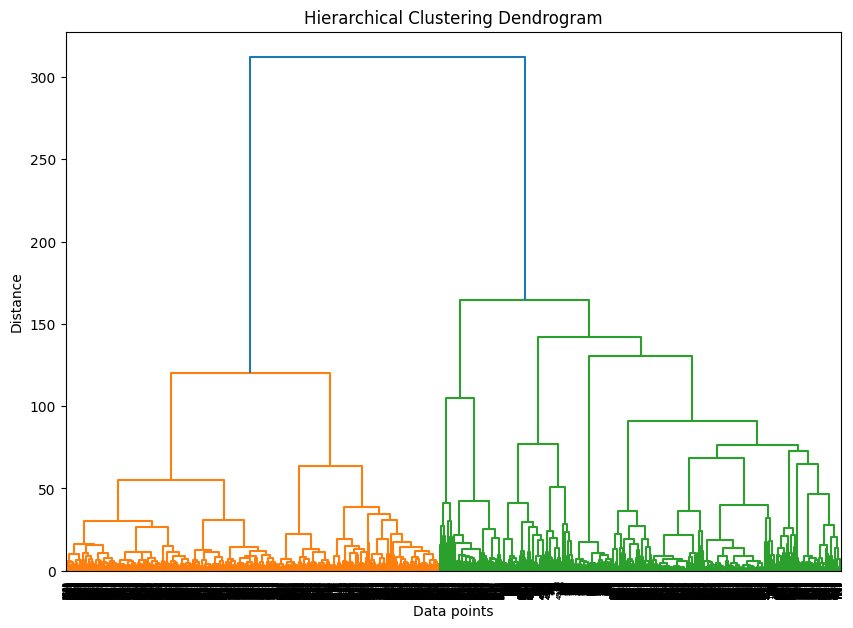

Silhouette Score: 0.34917834306499484


In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Linkage untuk dendrogram
Z = linkage(data_scaled, method='ward')

# Plot Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Membuat model clustering
hc_model = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hc_labels = hc_model.fit_predict(data_scaled)
print(f'Silhouette Score: {silhouette_score(data_scaled, hc_labels)}')


In [ ]:
best_k = 3  # Misalnya hasil dari Elbow atau Silhouette menunjukkan ini sebagai terbaik
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)
print(f'Silhouette Score: {silhouette_score(data_scaled, kmeans_labels)}')


Silhouette Score: 0.3336517041041939


In [ ]:
from sklearn.metrics import davies_bouldin_score

print(f'Davies-Bouldin Score (K-Means): {davies_bouldin_score(data_scaled, kmeans_labels)}')
print(f'Davies-Bouldin Score (Hierarchical): {davies_bouldin_score(data_scaled, hc_labels)}')


Davies-Bouldin Score (K-Means): 1.2655388064008637
Davies-Bouldin Score (Hierarchical): 1.4567542564065181
